# Text Mining Basic
## Download Data

In [56]:
%%bash # Run bash in notebook
wget  "http://www.glozman.com/TextPages/Harry%20Potter%201%20-%20Sorcerer's%20Stone.txt"
 wget  "http://www.glozman.com/TextPages/Harry%20Potter%202%20-%20Chamber%20of%20Secrets.txt"
 wget  "http://www.glozman.com/TextPages/Harry%20Potter%203%20-%20The%20Prisoner%20Of%20Azkaban.txt"
 wget  "http://www.glozman.com/TextPages/Harry%20Potter%204%20-%20The%20Goblet%20Of%20Fire.txt"
 wget  "http://www.glozman.com/TextPages/Harry%20Potter%205%20-%20Order%20of%20the%20Phoenix.txt"
 wget  "http://www.glozman.com/TextPages/Harry%20Potter%206%20-%20The%20Half%20Blood%20Prince.txt"
 wget  "http://www.glozman.com/TextPages/Harry%20Potter%207%20-%20Deathly%20Hollows.txt"

## Preprocessing

In this notebook, we will go through how to:
1. Use NLTK package to preprocess data
2. Run tf-idf analytic

NLTK is a Python package for Natural Language Processing. Users can tokenize and tag some text, identify named entities, dusplay a parse tree, and more. NLTK's full name is __N__ atural __L__ anguage __T__ ool __K__ it. It was developed by the Computer and Information Science at the University of Pennsylvania. The initial release is in 2001, but the stable release (version 3.4) was released 18 years later in 2018.

You can also visit a datacamp blog for more information: https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk. 

For details, please visit the website of the NLTK books: https://www.nltk.org/book/, or visit the official webpage: https://www.nltk.org/. 





In [24]:
# Import packages
import nltk 
import os, sys
import numpy as np
import string
import re
import gc

### Load data
We will use Harry Potter as our datasest. Make sure you have downloaded the data. 

Let's use another term for the text: corpus, meaning a collection of text. 

In [58]:
#sigh, cannot get this to work
import gzip
HPs = [file for file in os.listdir('./data/HP/') if file.startswith('Harry')]
text = ''
for HP in HPs:
    text += '\n'+ gzip.open('./data/HP/'+HP, 'rb').read()
    
print(text[:500])


In [26]:
os.path.abspath('.')

'C:\\Users\\loecherm\\Dropbox\\Markus\\Teaching\\SS2019\\AnalyticsLab\\Lessons'

In [27]:
HPs = [file for file in os.listdir('./data/HP/') if file.startswith('Harry')]
text = ''
for HP in HPs:
    text += '\n'+ open('./data/HP/'+HP, 'r', encoding='utf-8', errors='ignore').read()
    
print(text[:500]) # don't print all of them


Harry Potter and the Sorcerer's Stone 

CHAPTER ONE 

THE BOY WHO LIVED 

Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense. 

Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large must


In [60]:
#text

### Tokenization
Tokenization is the first step. The process breaks down text into smaller segments, for example into paragraphs or words. The smaller segments are called tokens. 

We will tokenize the text of Harry Potter into sentences, and then into words. The nltk function sent_tokenize seperates sentences by punctuations. 

In [28]:
sentences = nltk.tokenize.sent_tokenize(text)
print('We have',len(sentences), 'sentences in total.\n')
print(sentences[1000:2000:100])

We have 85850 sentences in total.

['Please find enclosed a list of all necessary books and equipment.', "As Hagrid's story came to a close, he saw again the blinding flash of green light, more clearly than he had ever remembered it before -- and he remembered something else, for the first time in his life: a high, cold, cruel laugh.", 'Harry scrambled to his feet, so happy he felt as though a large balloon was swelling inside him.', 'Hagrid took up two seats and sat knitting what looked like a canary-yellow circus tent.', "He grinned at Harry's amazement.", 'Madam Malkin was a squat, smiling witch dressed all in mauve.', 'Twenty minutes later, they left Eeylops Owl Emporium, which had been dark and full of rustling and flickering, jewel-bright eyes.', '"I remember every wand I\'ve ever sold, Mr. Potter.', 'He left without another word.', '"Ron, you\'ve got something on your nose."']


### Remove Punctuations
You can see that the above text are seperated into sentences and the sentences are in a list. Punctuations are not very important after we seperate text into sentences. 

In [29]:
table = str.maketrans("","", string.punctuation) # maketrans returns a translation table that maps each character in the intabstring into the character at the same position in the outtab string. https://www.tutorialspoint.com/python/string_maketrans.htm
sentences = [s.translate(table) for s in sentences] # It takes some time; inbuilt tokenizer cannot detect shortform like don't, I've etc

### Words Tokenization
After removing punctuations, we can now seperate words in sentences. We will use simple regular expression to seperate words, and then turn all the words into lower case. 

In [30]:
tokenizer = nltk.tokenize.RegexpTokenizer('\s+', gaps=True)
tokens = [tokenizer.tokenize(s) for s in sentences] # It takes some time; inbuilt tokenizer cannot detect shortform like don't, I've etc
print('We have', np.reshape(np.concatenate(tokens), -1).shape[0], 'words in total. \n') # DON'T do len(sum(tokens,[])) because of speed
print(tokens[100:200:20])

# Lower 
tokens = [[t.lower() for t in s] for s in tokens]

We have 1084145 words in total. 

[['Well', 'Ted', 'said', 'the', 'weatherman', 'I', 'dont', 'know', 'about', 'that', 'but', 'its', 'not', 'only', 'the', 'owls', 'that', 'have', 'been', 'acting', 'oddly', 'today'], ['Well', 'I', 'just', 'thought', 'maybe', 'it', 'was', 'something', 'to', 'do', 'with', 'you', 'know', 'her', 'crowd'], ['Mrs', 'Dursley', 'fell', 'asleep', 'quickly', 'but', 'Mr', 'Dursley', 'lay', 'awake', 'turning', 'it', 'all', 'over', 'in', 'his', 'mind'], ['He', 'found', 'what', 'he', 'was', 'looking', 'for', 'in', 'his', 'inside', 'pocket'], ['When', 'you', 'could', 'have', 'been', 'celebrating']]


### Frequency Distribution
The nltk package provides a useful class called FreqDist. The FreqDist can quickly show how frequent a word occurs in the coprus. 

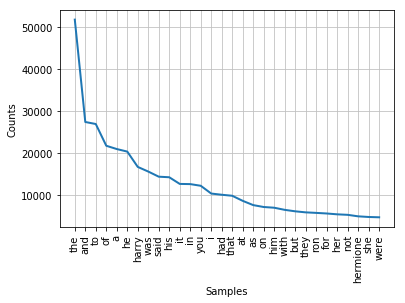

In [31]:
from nltk.probability import FreqDist

# Turn corpus into np before unnest the list
tokens = np.array([np.array(s) for s in tokens]) # numpy can handle text as well
# DON'T DO THIS! (Too slow) # fdist = FreqDist(sum(tokens,[])) # sum(tokens,[]) --> unnest tokens

fdist = FreqDist(np.concatenate(tokens))

fdist.most_common(5)

import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

### Stopwords
The most common words occur in Harry Potter are 'the', 'and', 'to', 'of', 'a', 'he' etc. Those high-frequency words are called stopwords. "Stopwords usually have little lexical content, and their presence in a text fails to distinguish it from other texts.", according to the nltk book. To our excerise, those words contain less information, so we will remove those words. 

We use the nltk inbuilt stopwords list to filter out. 

In [32]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print("Let's have a look of the inbuilt stopewords of nltk: \n", stop_words)

Let's have a look of the inbuilt stopewords of nltk: 
 {'against', 'some', 'him', 'once', 'm', 'yours', 'wasn', 'them', 'on', "doesn't", 'while', "mustn't", 'me', 'these', "won't", 'because', 'by', 'ma', "you'll", "don't", 'does', 'each', 'into', 'to', 'you', 'in', 'nor', 'if', 'shan', 'doesn', 'at', 'further', 'didn', "you'd", 'ourselves', 'not', 'off', 'ain', 'himself', 'theirs', 'during', 'a', 'll', 'but', 'my', 'or', 'they', 'of', 'do', 'under', 'hers', "you've", 'were', 'as', 'when', "isn't", 'after', 'aren', 'why', 'yourself', 'there', 'herself', "mightn't", "shan't", 'being', "shouldn't", 'the', 'up', 'very', "hasn't", "aren't", 'couldn', 'should', 'that', 'few', "haven't", 'having', 'doing', 'how', 'been', 'was', 'between', 'are', 'and', "she's", 'has', 'his', 'same', 'mustn', 'we', 'it', 'whom', 'more', 'her', 're', 'above', 'through', 'themselves', 'only', 'needn', 's', "needn't", "didn't", 'will', 'most', 'had', 'did', 'then', 'am', 'other', 'shouldn', 'with', 'no', 'who', '

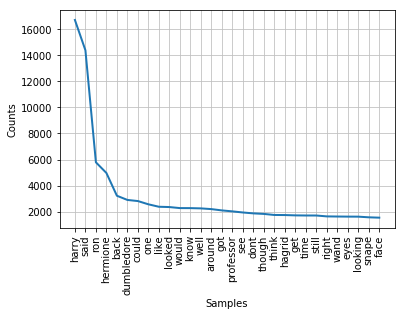

In [33]:
tokens = [[w for w in s if w not in stop_words] for s in tokens]
tokens = np.array([np.array(s) for s in tokens])
fdist = FreqDist(np.concatenate(tokens))
fdist.plot(30,cumulative=False)
plt.show()

## Bag of Words (BOW)
The bag-of-words model (BOW) is a simplifying representation commonly used in natural language processing and information retrieval. Researchers make use of BOW model to classify objects. 

Concept of BOW:
Consider the following corpus:
“It was the best of times”
“It was the worst of times”
“It was the age of wisdom”
“It was the age of foolishness”

It is obvious that the phase "it was" is quite important according to its frequency occur in the text. However, simple count of single word cannot reflect the importance of phases. A simple solution would be __bigram__. Bigram takes two words at time, so the information about phases are also captured. The generalized term of considering two or more words is called __n-grams__. 

Example taken from: https://medium.com/greyatom/an-introduction-to-bag-of-words-in-nlp-ac967d43b428

A very nice paper about Bag-ofWords Model: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.453.5924&rep=rep1&type=pdf

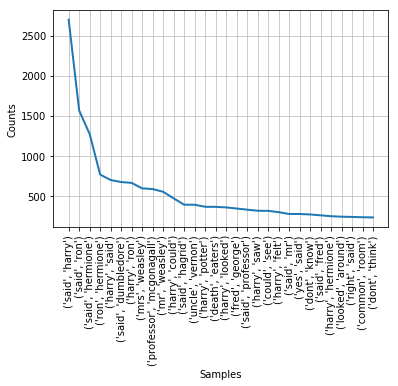

In [37]:
from nltk import bigrams, ngrams
bigrams_tokens = bigrams(np.concatenate(tokens))
fdist_bigrams = FreqDist(list(bigrams_tokens))
fdist_bigrams.plot(30,cumulative=False)
plt.show()

In [ ]:
# n=3
trigrams_tokens = ngrams(np.concatenate(tokens), 3)
fdist_trigrams = FreqDist(list(trigrams_tokens))
fdist_trigrams.plot(30,cumulative=False)
plt.show()

In [ ]:
# n=4
grams4_tokens = ngrams(np.concatenate(tokens), 4)
fdist_grams4 = FreqDist(list(grams4_tokens))
fdist_grams4.plot(30,cumulative=False)
plt.show()

In [ ]:
# n=5
grams5_tokens = ngrams(np.concatenate(tokens), 5)
fdist_grams5 = FreqDist(list(grams5_tokens))
fdist_grams5.plot(30,cumulative=False)
plt.show()

### Sum up the process to a function

In [34]:
# text to sentence
def preprocessing_text(text, ngrams_=1):
    # sent tokenization
    sentences = nltk.tokenize.sent_tokenize(text)
    
    # remove punkt
    table = str.maketrans("","", string.punctuation)  
    sentences = [s.translate(table) for s in sentences]
    
    # word tokenization
    tokenizer = nltk.tokenize.RegexpTokenizer('\s+', gaps=True)
    tokens = [tokenizer.tokenize(s) for s in sentences]
    
    # to lower case
    tokens = [[t.lower() for t in s] for s in tokens]
    
    stop_words=set(stopwords.words("english"))
    tokens = [[w for w in s if w not in stop_words] for s in tokens]
    
    # to numpy array
    tokens = np.array([np.array(s) for s in tokens])
    tokens = np.concatenate(tokens)
    
    # to ngrams
    if ngrams_>1:
        tokens = ngrams(tokens, ngrams_)

    return tokens

HPs = [file for file in os.listdir('./data/HP/') if file.startswith('Harry')]

corpus = {}

for i, HP in enumerate(HPs):
    temp = '\n'+ open('./data/HP/'+HP, 'r', encoding='utf-8', errors='ignore').read()
    corpus['HP%s'%i] = nltk.Text(list(preprocessing_text(temp,1))) # wrap the text by the nltk Text class for more functions
    
#corpus['HP2'].concordance('harry') # only for unigram

In [35]:
corpus["HP1"]

<Text: 1 harry potter chamber secrets j k rowling...>

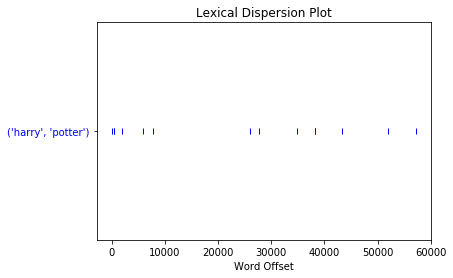

In [38]:
for i, HP in enumerate(HPs):
    temp = '\n'+ open('./data/HP/'+HP, 'r', encoding='utf-8', errors='ignore').read()
    corpus['HP%s'%i] = nltk.Text(list(preprocessing_text(temp,2)))

corpus['HP2'].dispersion_plot([('harry', 'potter')])

## TF-IDF

term frequency-inverse document frequency (TFIDF) is a statistic that designed for showing importance of a word to a document or coprus. Simple word cannot reflect the importance of a word. To addrease the problem, the tfidf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word.

The tfidf is calculated as follow:


$$ tfidf = tf_{ij} . idf $$ where:

$ tf =$ frequency of term $T_j$ in docuument $D_i$

$ idf = log_2(\frac{N}{n}) $

$ N =$ number of documents in collection

$n = $ number of documents where $T_j$ occurs at least once

(ref: https://www.researchgate.net/publication/221228354_Mobile_Access_to_Web_Systems_Using_a_Multi-device_Interface_Design_Approach/figures?lo=1)


In other words. tfidf is 
1. highest when a term $t$ occurs many times within a small number of documents (thus lending high discriminating power to those documents);
2. lower when the term occurs fewer times in a document, or occurs in many documents (thus offering a less pronounced relevance signal);

3. lowest when the term occurs in virtually all documents.



(ref: https://nlp.stanford.edu/IR-book/html/htmledition/tf-idf-weighting-1.html)

In [39]:
from collections import Counter, defaultdict
import pandas as pd
import pandas as pd
temp = []
for h, c in corpus.items():
    temp.append(pd.DataFrame.from_dict(Counter(c), orient='index'))
#     pd.DataFrame.from_dict(Counter(corpus['HP1']), orient='index')

term_count = pd.concat(temp, axis=1)
term_count.reset_index(inplace=True)
term_count.columns = ['token1', 'token2', 'HP1', 'HP2', 'HP3', 'HP4', 'HP5', 'HP6', 'HP7']
term_count['sum'] = term_count.sum(axis = 1, skipna = True) 
term_count.fillna(0, inplace=True)
term_count.sort_values('sum', ascending=False, inplace=False).head()

C:\Users\loecherm\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,token1,token2,HP1,HP2,HP3,HP4,HP5,HP6,HP7,sum
266121,said,harry,142.0,226.0,256.0,436.0,698.0,535.0,404.0,2697.0
266641,said,ron,111.0,204.0,173.0,306.0,338.0,194.0,238.0,1564.0
266153,said,hermione,42.0,68.0,122.0,214.0,414.0,187.0,223.0,1270.0
261174,ron,hermione,35.0,55.0,102.0,146.0,145.0,107.0,174.0,764.0
140697,harry,said,20.0,56.0,74.0,157.0,189.0,112.0,88.0,696.0


In [29]:
TF = term_count.iloc[:,2:9]/(term_count.iloc[:,2:9].sum(axis=0))

In [30]:
IDF = np.log(7/((term_count.iloc[:,2:9]/term_count.iloc[:,2:9]).sum(axis=1)))

In [31]:
TFIDF = TF.apply(lambda col: col*IDF)
TFIDF = pd.concat([term_count.iloc[:,:2],TFIDF], axis=1)
TFIDF['sum'] = TFIDF.sum(axis=1)

In [33]:
TFIDF.sort_values('sum', ascending=False).head(10)

,token1,token2,HP1,HP2,HP3,HP4,HP5,HP6,HP7,sum
67510,death,eaters,0.0,0.000000,0.000000,0.000333,0.000357,0.000416,0.000759,0.001866
206954,mr,crouch,0.0,0.000000,0.000000,0.001840,0.000009,0.000000,0.000000,0.001849
266752,said,slughorn,0.0,0.000000,0.000000,0.000000,0.000000,0.001810,0.000000,0.001810
243280,professor,lupin,0.0,0.000000,0.001552,0.000041,0.000024,0.000000,0.000000,0.001617
243347,professor,umbridge,0.0,0.000000,0.000000,0.000000,0.001582,0.000014,0.000000,0.001596
266340,said,lupin,0.0,0.000000,0.000930,0.000000,0.000197,0.000159,0.000235,0.001521
85464,elder,wand,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.001097,0.001097
266315,said,lockhart,0.0,0.000989,0.000000,0.000000,0.000009,0.000000,0.000000,0.000998
266628,said,riddle,0.0,0.000781,0.000000,0.000000,0.000000,0.000192,0.000000,0.000973
265645,said,black,0.0,0.000000,0.000933,0.000000,0.000000,0.000000,0.000000,0.000933


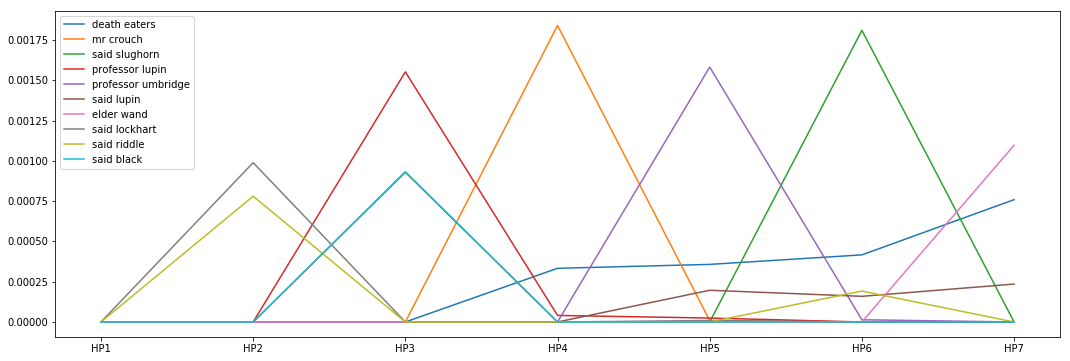

In [98]:
toPlot = TFIDF.sort_values('sum', ascending=False).head(10)
statistic = toPlot.iloc[:,2:9]
statistic.set_index(toPlot['token1'] + ' ' + toPlot['token2'], inplace=True)

toPlot = statistic.T
plt.figure(figsize=(18,6))
for c in toPlot:
    plt.plot(toPlot[c], label=toPlot[c].name)
plt.legend()
plt.show()

## Other
### Create unique set of words
In order to work on basic statistics of the corpus words like count and frequency of words, we need to create unique set of words. 

In [40]:
tokens_flat = np.reshape(np.concatenate(tokens), -1)
uniqueWords = np.unique(tokens_flat)
print("We have",uniqueWords.shape[0],"unique words in corpus.")

We have 24400 unique words in corpus.


A more detailed text mining project on Harry Potter: https://github.com/eleanorstrib/potter/blob/master/bossy.ipynb

In [43]:
import nltk
import string
import os

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer

path = './data/HP/'
token_dict = {}


def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = []
    for item in tokens:
        stems.append(PorterStemmer().stem(item))
    return stems

tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words='english')

#str = 'all great and precious things are lonely.'
#response = tfidf.transform([str])
#print(response)

tfs = tfidf.fit_transform(corpus)


In [46]:
tfs

<1392226x13902 sparse matrix of type '<class 'numpy.float64'>'
	with 903196 stored elements in Compressed Sparse Row format>

In [13]:
%run "CorpusUtils.py"

In [2]:
os.path.abspath('.')

'C:\\Users\\loecherm\\Dropbox\\Markus\\Teaching\\SS2019\\AnalyticsLab\\Lessons'

In [7]:
corpus = makeCleanCorpus(abspath = os.path.abspath('.') + '/data/HP/')

Done reading files...


-------------------------------------------------- 

Done reading files...


-------------------------------------------------- 

Done reading files...


-------------------------------------------------- 

Done reading files...


-------------------------------------------------- 

Done reading files...


-------------------------------------------------- 

Done reading files...


-------------------------------------------------- 

Done reading files...


-------------------------------------------------- 

Cleaning: Harry Potter 1 - Sorcerer's Stone.txt
Cleaning: Harry Potter 2 - Chamber of Secrets.txt
Cleaning: Harry Potter 3 - The Prisoner Of Azkaban.txt
Cleaning: Harry Potter 4 - The Goblet Of Fire.txt
Cleaning: Harry Potter 5 - Order of the Phoenix.txt
Cleaning: Harry Potter 6 - The Half Blood Prince.txt
Cleaning: Harry Potter 7 - Deathly Hollows.txt

Done!


In [11]:

type(corpus)  # dict

corpus.keys()
# mycorpus.values()  # DON'T RUN THIS!

dict_keys(["Harry Potter 1 - Sorcerer's Stone.txt", 'Harry Potter 2 - Chamber of Secrets.txt', 'Harry Potter 3 - The Prisoner Of Azkaban.txt', 'Harry Potter 4 - The Goblet Of Fire.txt', 'Harry Potter 5 - Order of the Phoenix.txt', 'Harry Potter 6 - The Half Blood Prince.txt', 'Harry Potter 7 - Deathly Hollows.txt'])

In [14]:
##### Make the DTM
dtm = makeDTM(corpus, tfidf=False)

dtm

,aa,aaaaaaaaaargh,aaaaaaaargh,aaaaaaaarrrrrgh,aaaaaaand,aaaaaaarrrgh,aaaaaah,aaaaaand,aaaaah,aaaaahed,...,zombie,zone,zonko,zonkos,zoo,zoological,zoom,zoomed,zoomign,zooming
Harry Potter 1 - Sorcerer's Stone.txt,0,1,0,0,0,0,0,0,0,0,...,2,0,0,0,7,0,1,1,0,2
Harry Potter 2 - Chamber of Secrets.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,2,0,0
Harry Potter 3 - The Prisoner Of Azkaban.txt,0,0,0,0,0,1,0,0,0,0,...,1,0,1,10,0,0,0,9,0,3
Harry Potter 4 - The Goblet Of Fire.txt,0,0,0,1,1,0,0,1,1,1,...,0,0,0,1,0,1,4,9,0,12
Harry Potter 5 - Order of the Phoenix.txt,0,0,0,0,0,0,1,0,0,0,...,0,1,3,0,0,0,2,23,0,7
Harry Potter 6 - The Half Blood Prince.txt,1,0,1,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,7,0,2
Harry Potter 7 - Deathly Hollows.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,6,1,4


In [19]:
col_sums = dtm.sum()
type(col_sums)    # is a pandas Series
col_sums['wand']  # 
col_sums['dumbledore']  # 

# most frequent words:
# sort the col sums in descending order 
top50 = col_sums.sort_values(ascending=False)[0:50]
type(top50)
top50
top50.index  # use this later on for cluster analysis

Index(['harry', 'ron', 'hermione', 'dumbledore', 'like', 'looked', 'around',
       'professor', 'though', 'hagrid', 'still', 'snape', 'wand', 'eyes',
       'weasley', 'going', 'voice', 'thought', 'saw', 'something', 'malfoy',
       'behind', 'potter', 'seemed', 'asked', 'told', 'didnt', 'voldemort',
       'sirius', 'turned', 'us', 'dark', 'harrys', 'knew', 'want', 'tell',
       'heard', 'people', 'left', 'really', 'black', 'felt', 'fred', 'im',
       'moment', 'hogwarts', 'you', 'front', 'came', 're'],
      dtype='object')

1624

In [20]:
##### Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt
tdm50 = dtm.loc[:, top50.index]

link = linkage(tdm50.values, 'ward')



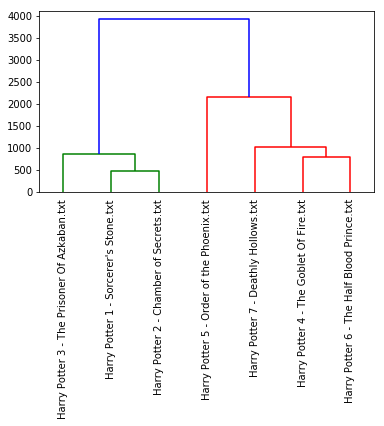

In [21]:
labelList = tdm50.index
labelList


# plt.figure(figsize=(10, 7)) 
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.25)
dummy = dendrogram(link,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True,
            leaf_rotation=90,
            leaf_font_size=10
            )

plt.show()  

### Gutenberg boks

We used the Project Gutenberg to obtain   

* some well-known works of the **Bronte sisters**, namely *Jane Eyre, Wuthering Heights, The Tenant of Wildfell Hall, Villette*, and *Agnes Grey*.  
* some science fiction and fantasy novels by **H.G. Wells**, who lived in the late 19th and early 20th centuries, namely *The Time Machine, The War of the Worlds, The Invisible Man*, and *The Island of Doctor Moreau*.
* A corpus of **physics** texts, namely *Discourse on Floating Bodies by Galileo Galilei, Treatise on Light by Christiaan Huygens, Experiments with Alternate Currents of High Potential and High Frequency by Nikola Tesla*, and *Relativity: The Special and General Theory by Albert Einstein*. (This is a pretty diverse bunch. They may all be physics classics, but they were written across a 300-year timespan, and some of them were first written in other languages and then translated to English.)



### Tasks


1. Compare the Bronte Sister novels tfidf terms with those of H.G. Wells 
2. Cluster the combined corpus Bronte/Wells
3. Find the top 10 tfidf unigrams/bigrams for each book from the physics corpus

##### Extra Credit

Reproduce this graph of the top 100 words in the Wells/Bronte texts

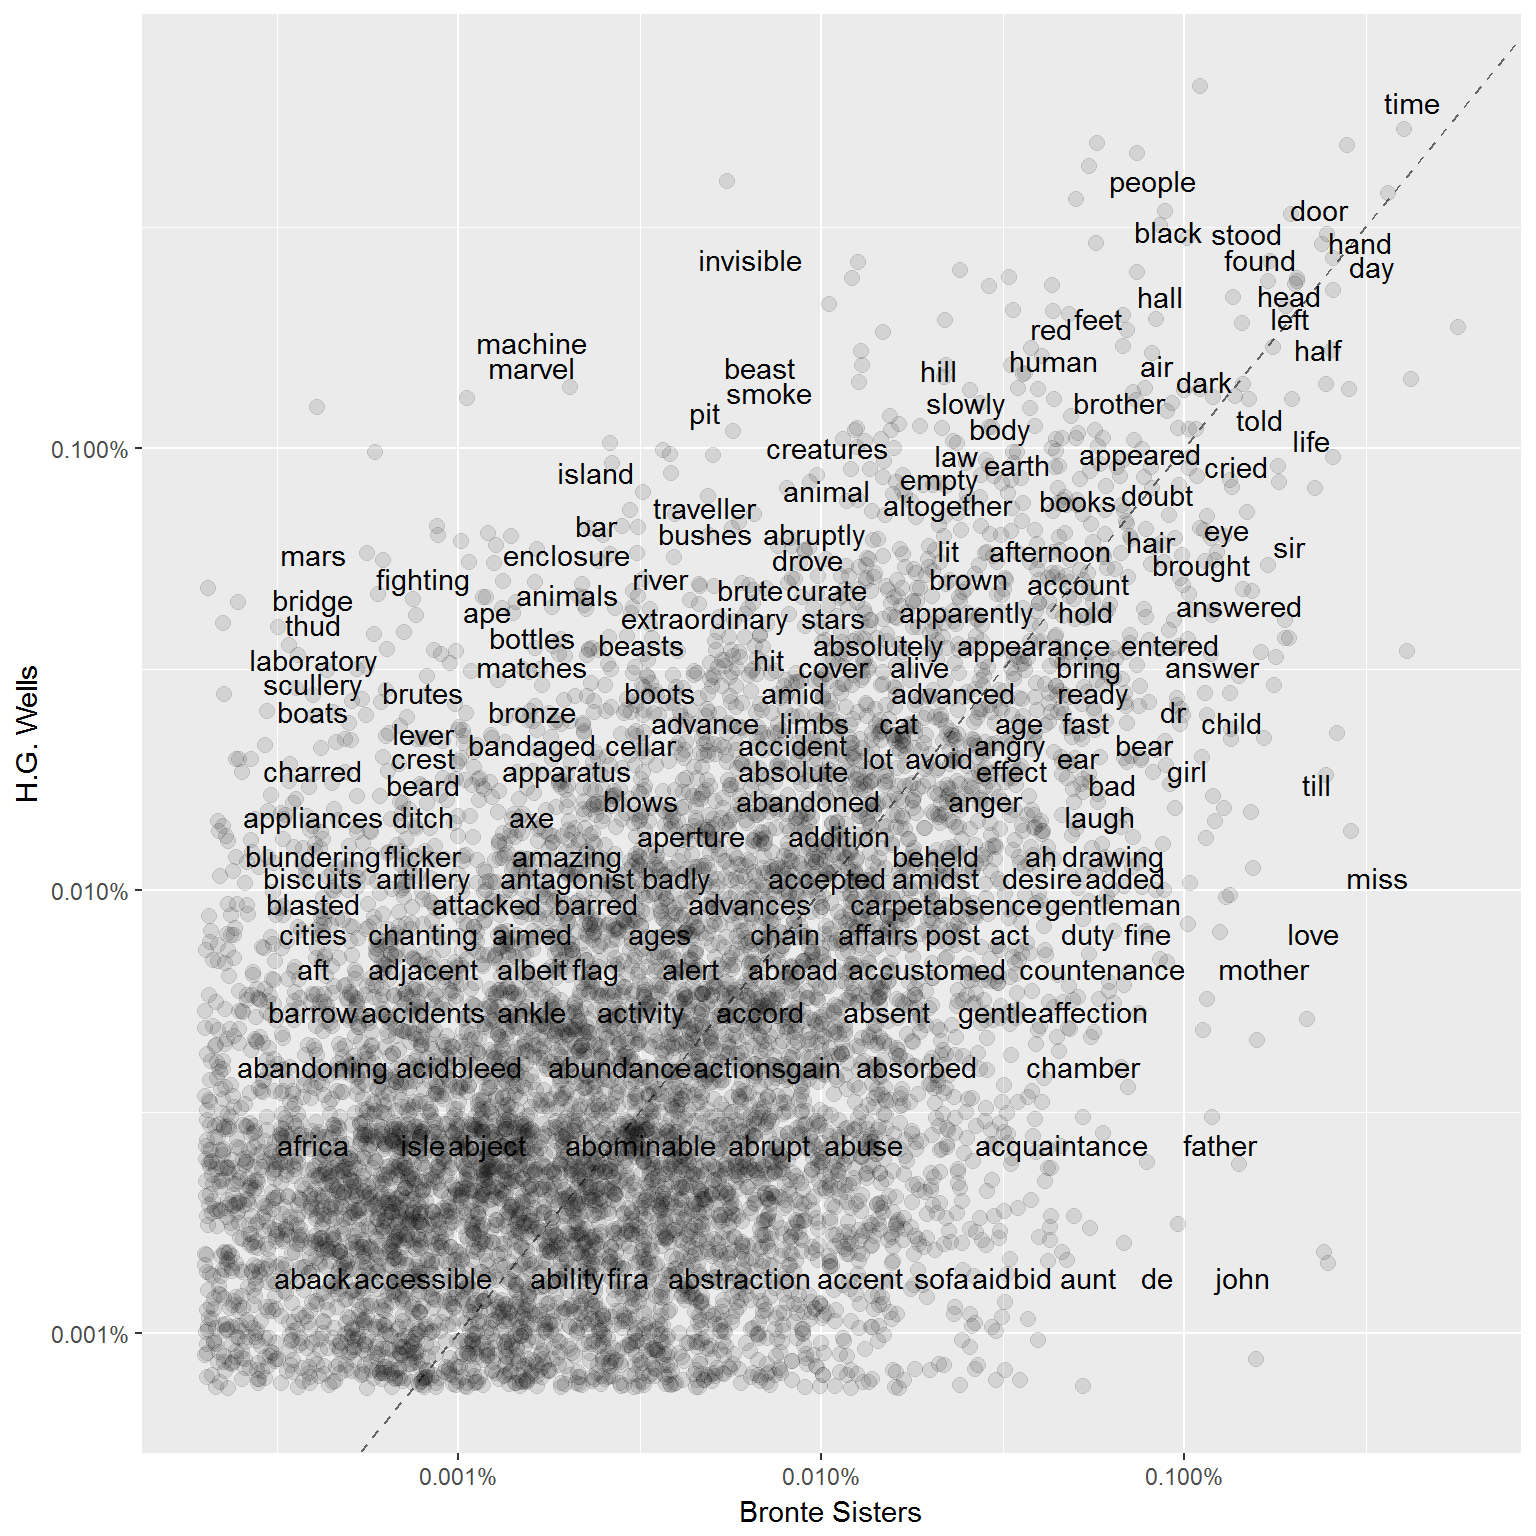